In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson.ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isDir(housing_path):
        os.makeDirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()


AttributeError: module 'posixpath' has no attribute 'isDir'

In [2]:
import pandas as pd
housing=pd.read_csv("housing.csv")
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [3]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


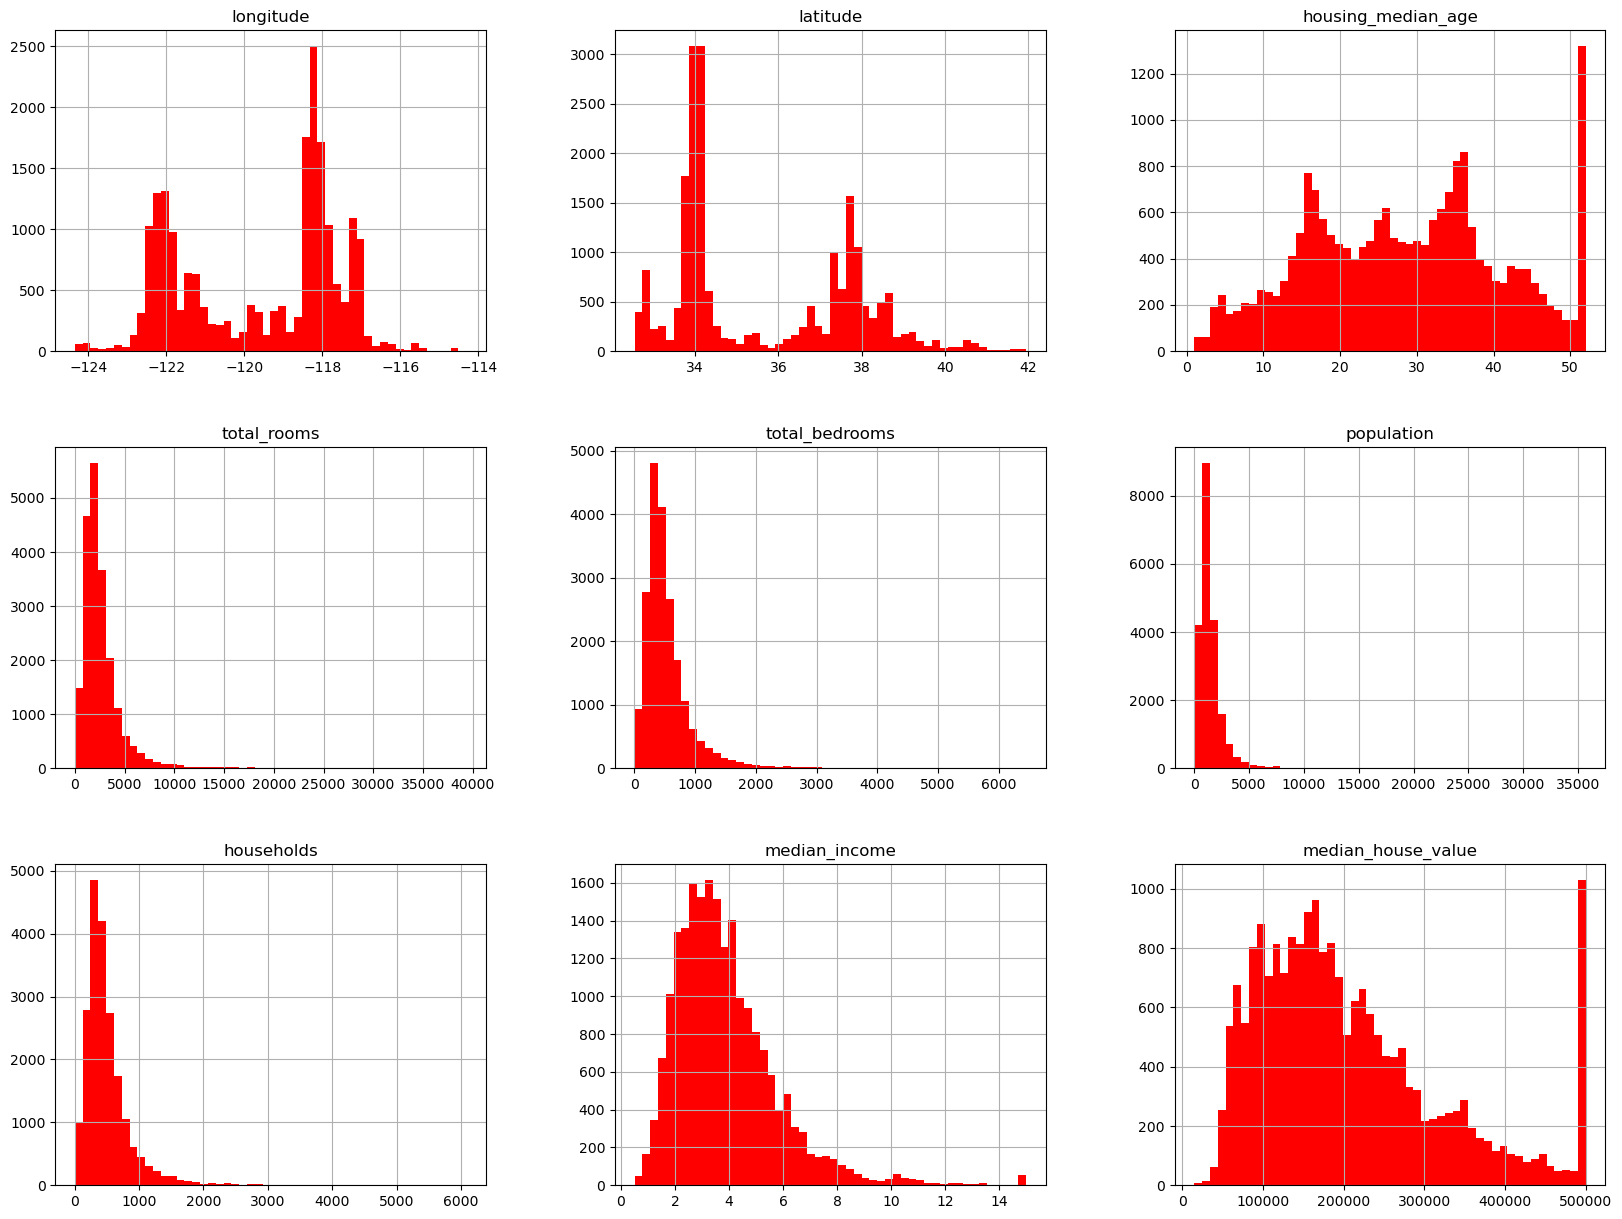

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15),color="red")
plt.show()

In [8]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
np.random.seed(42)
train_set,test_set=split_train_test(housing,0.2)

In [9]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [10]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set,test_set=split_train_test(housing,0.2)

In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN


<Axes: >

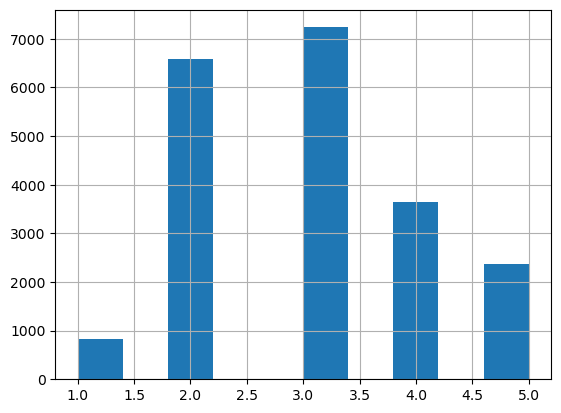

In [13]:
import pandas as pd
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
for set_ in(strat_train_set,strat_test_set):
    set_ .drop("income_cat",axis=1,inplace=True)

In [17]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

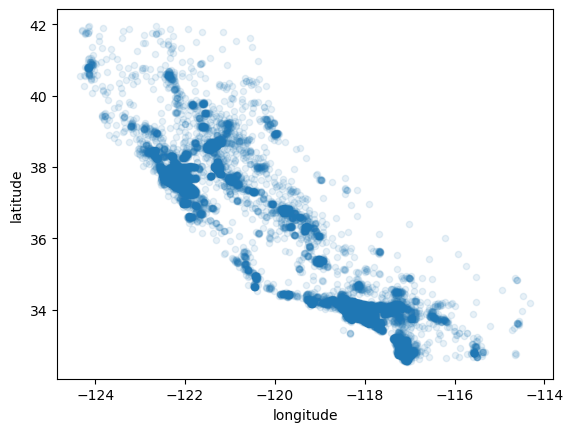

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

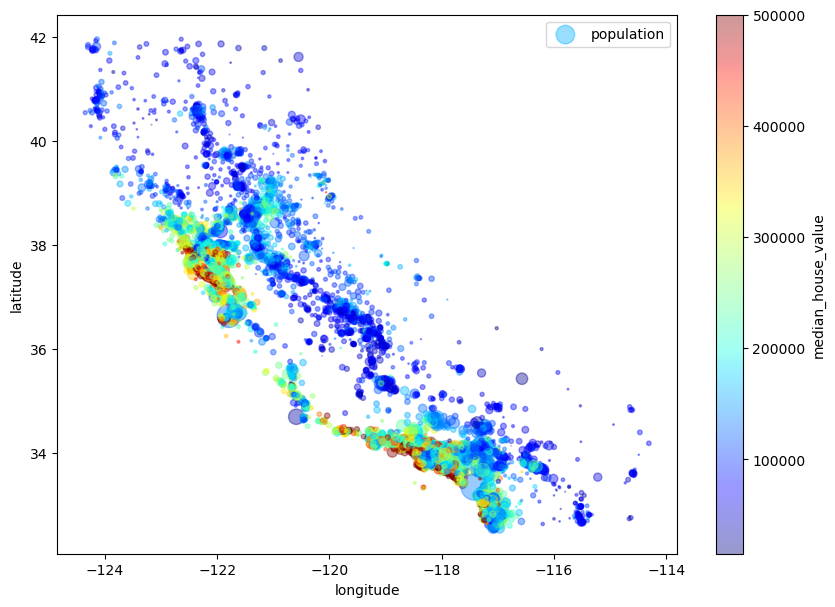

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True
)
plt.legend()

In [20]:
from pandas.plotting import scatter_matrix
attribute=[]

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

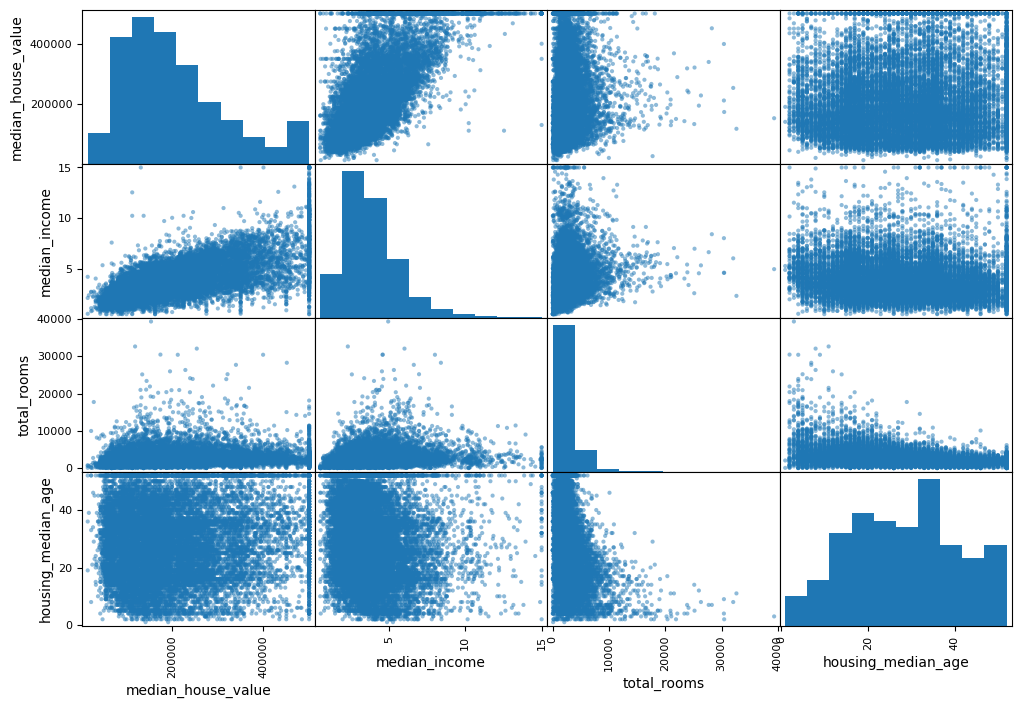

In [21]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

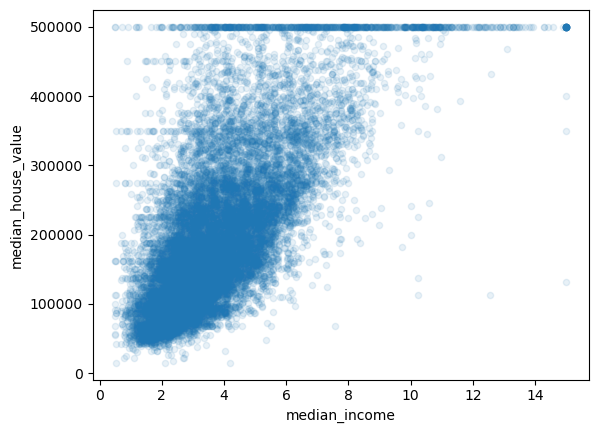

In [22]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [23]:

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_3168/1308017919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value    1.000000
median_income         0.686865
total_rooms           0.138007
housing_median_age    0.105329
households            0.070014
total_bedrooms        0.052814
population           -0.021544
longitude            -0.051167
latitude             -0.137691
Name: median_house_value, dtype: float64

In [24]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [25]:
median=housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [27]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
x=imputer.transform(housing_num)

In [30]:
imputer.statistics_


array([-118.48  ,   34.25  ,   29.    , 2129.    ,  436.    , 1168.    ,
        411.    ,    3.5341])

In [31]:
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [32]:
housing_tr


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361
...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625


In [33]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
16415,INLAND
1279,INLAND
7741,<1H OCEAN
4425,<1H OCEAN
1283,INLAND
18580,<1H OCEAN
8407,<1H OCEAN
18868,NEAR BAY
6306,<1H OCEAN
2422,INLAND


In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.]])

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>